# Data visualization project

### 1. Main resulsts and conclusions

Color measurements of printouts of douglas color cards actually show difference from the reference card. Even if these differences are barely visible by the human eye, we can observe them both on the individual level and across a whole sheet.
In fact, several specific color spots show consistently higher ΔE values across all color cards, and we can also se a general increase in the ΔE values off all whole color cards when moving down the rows in sheets. 

The last section (7) contains all of the code necessary to run all of the following cells. Run it to make them work properly.

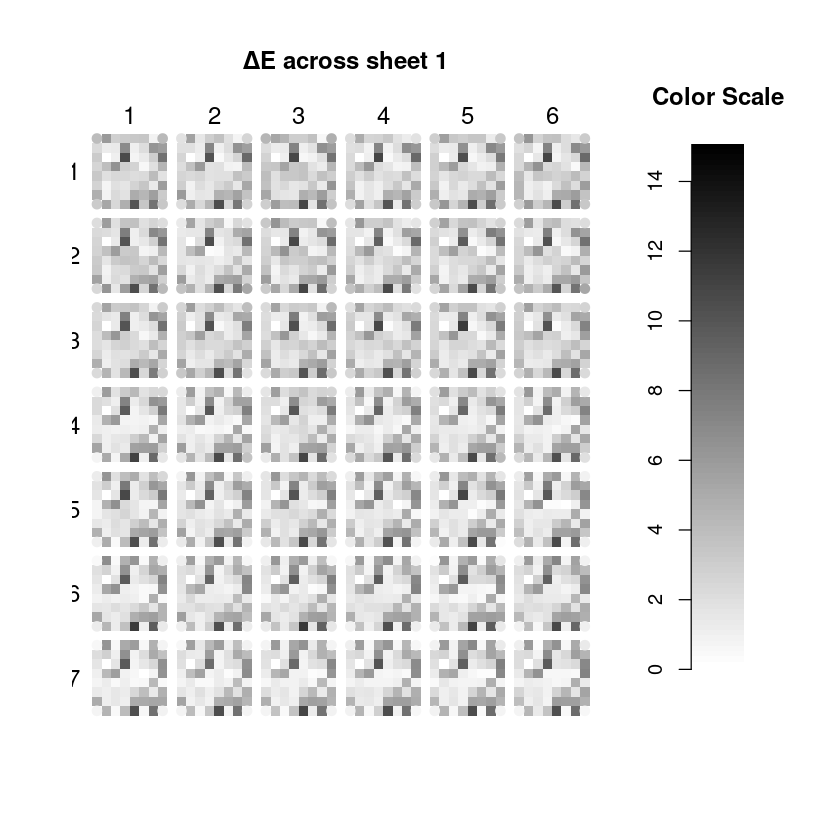

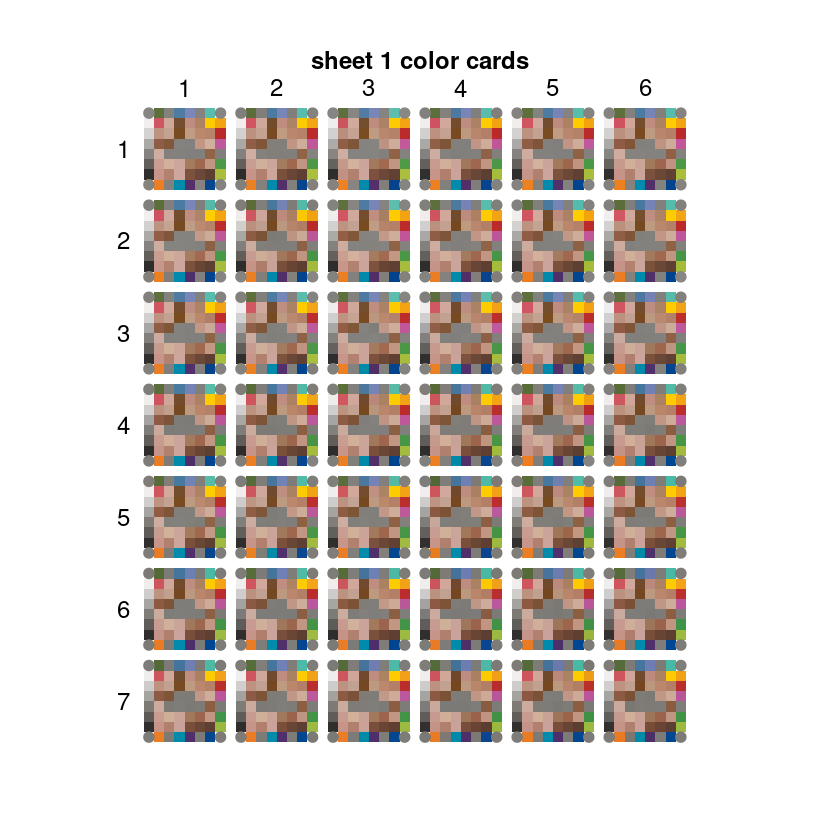

In [97]:
print_color_cards_values_grid(sheet_1, mode = "Delta_E", card_title = "ΔE across sheet 1")
print_color_cards_grid(sheet_1, "sheet 1 color cards")

The dispersion of Lab values themselves are hard to visualize using these grid representations, but can be seen more clearly using 3 dimensional scatter plots. Each color spot can be observed as a cluster of points in the Lab space, with variance across all points.

In [98]:
rgb_hex_values <- apply(lab_measurements_wide, 1, function(row) lab_to_rgb(row["L"], row["a"], row["b"]))

scatterplot3js(
  x = lab_measurements_wide$a,
  y = lab_measurements_wide$b,
  z = lab_measurements_wide$L,
  color = rgb_hex_values,
  flip.y = FALSE,
  size = 0.1,
  axisLabels = c("a", "L", "b"),
  main = "3D Scatter Plot of Lab Measurements"
)

HTML widgets cannot be represented in plain text (need html)

### 2. Detailed findings

First, mean color cards were calculated and displayed. By substracting or adding the standard deviation of L, a and b values along each color spot, we can observe slightly different cards.

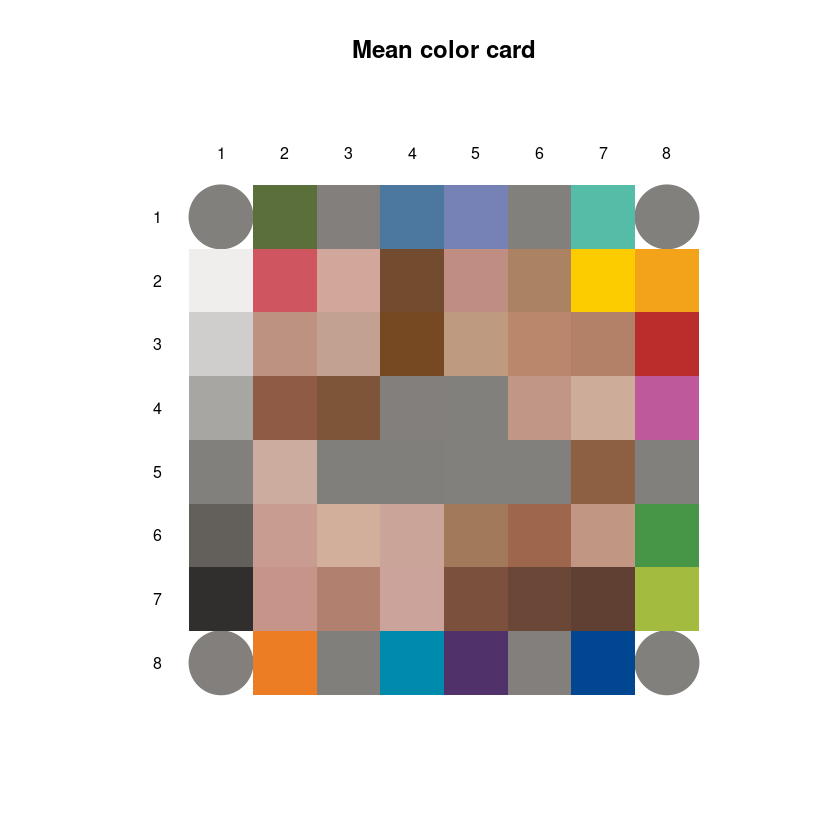

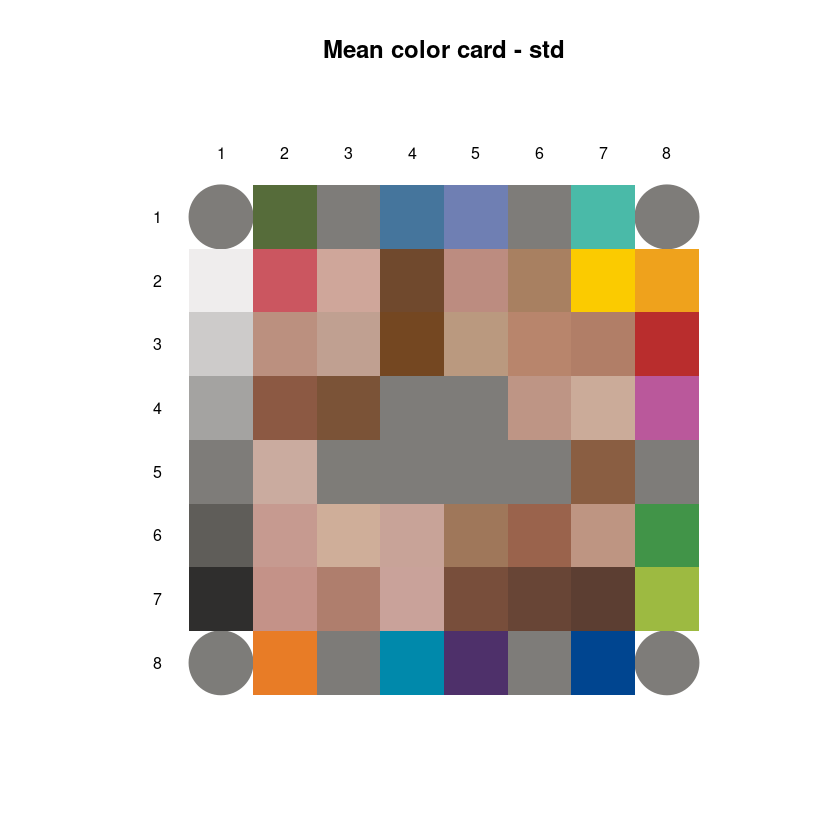

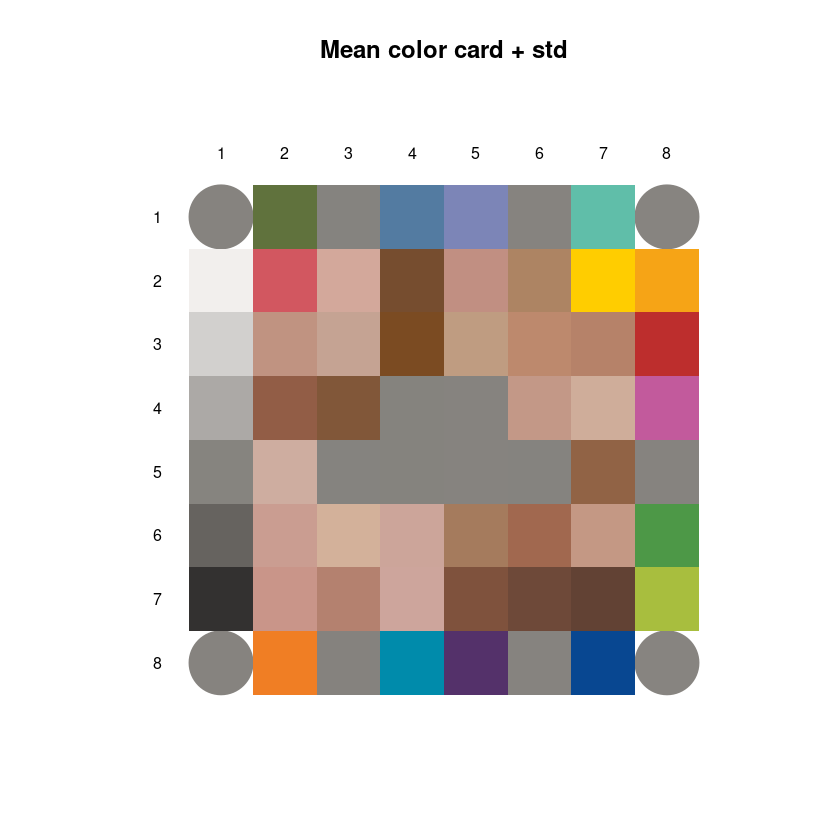

In [99]:
#displaying the colorcards
print_color_card_rgb(lab_measurements_stats$mean_L,
                     lab_measurements_stats$mean_a,
                     lab_measurements_stats$mean_b, 
                     card_title = "Mean color card")

print_color_card_rgb(lab_measurements_stats$mean_L - lab_measurements_stats$sd_L, 
                     lab_measurements_stats$mean_a - lab_measurements_stats$sd_a, 
                     lab_measurements_stats$mean_b - lab_measurements_stats$sd_b, 
                     card_title = "Mean color card - std")

print_color_card_rgb(lab_measurements_stats$mean_L + lab_measurements_stats$sd_L, 
                     lab_measurements_stats$mean_a + lab_measurements_stats$sd_a, 
                     lab_measurements_stats$mean_b + lab_measurements_stats$sd_b, 
                     card_title = "Mean color card + std")

Displaying L, a, b or ΔE values for each specific color spot can show us the mean value for each color component at each spot,and which spots tend to globally vary the most from the reference card. Darker spots on the mean ΔE card indicate a tendency of that specific spot to vary most from the reference card. We will observe these tendencies at the sheet scale also.
Lab values are hard to interpret this way, but for example on the map of L values, the spots of the first column show a clear increase as we go down in the rows. This is explained by the fact that these spots are increasingly darker grays. 

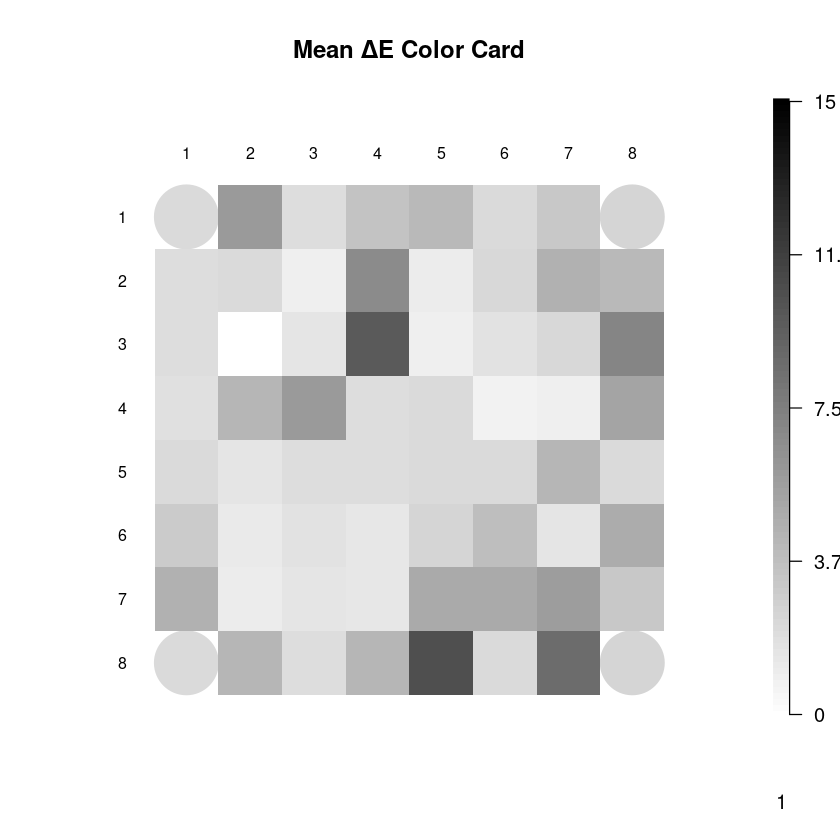

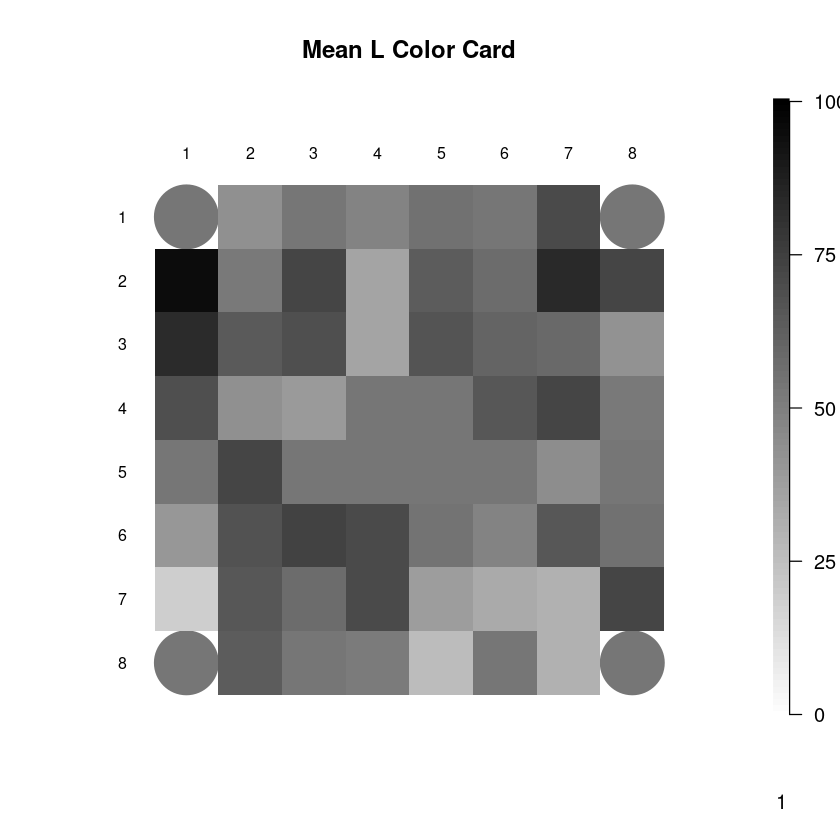

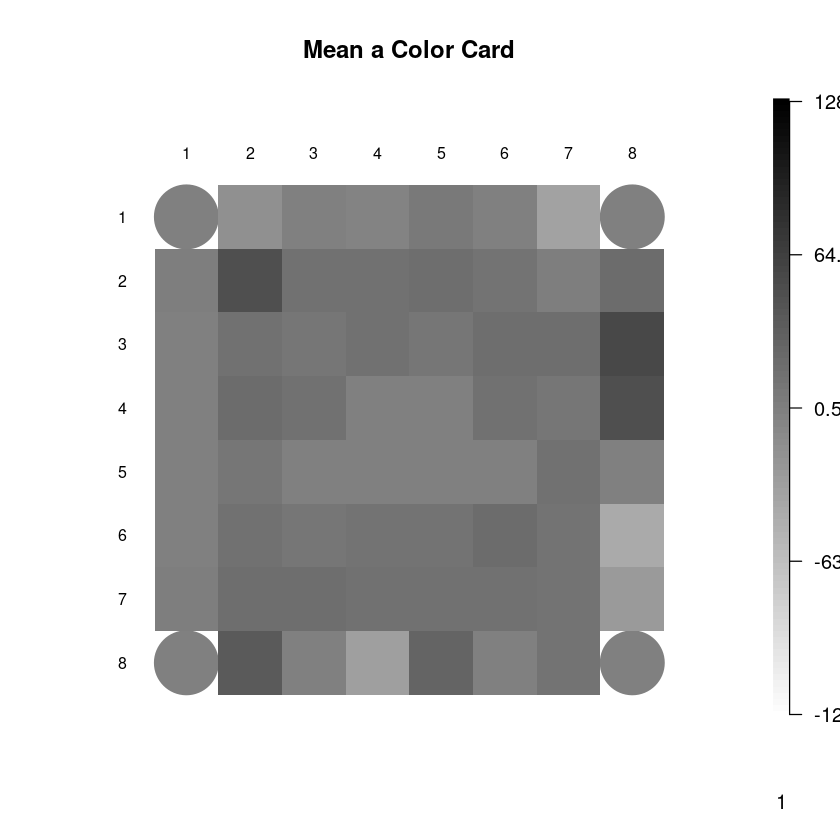

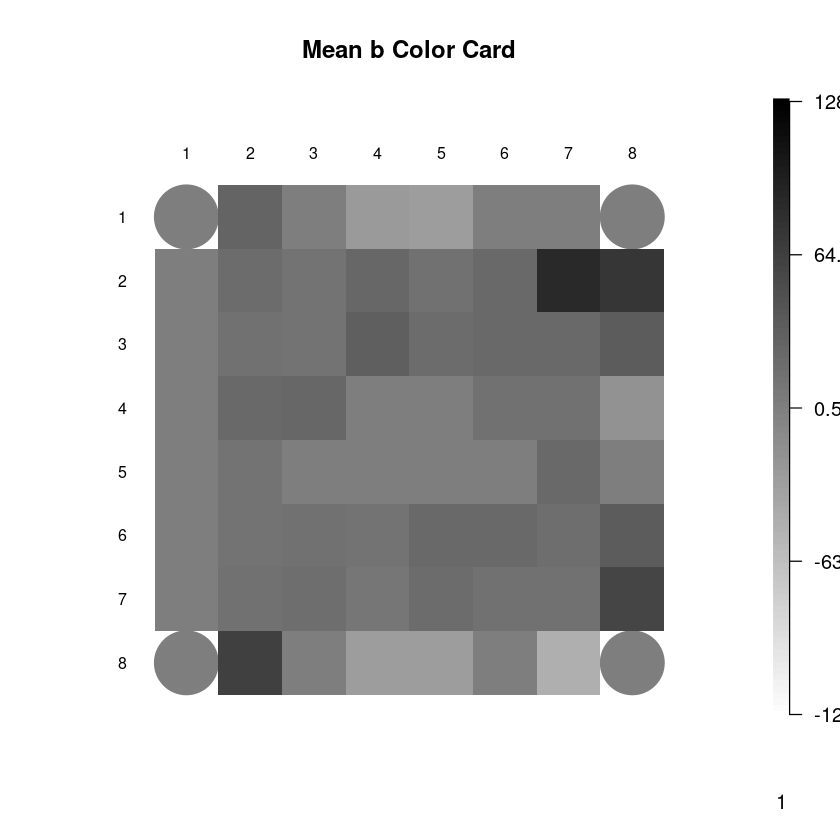

In [100]:
#displaying values on color cards
print_color_card_values(deltaE_stats$mean_deltaE, mode = "deltaE", card_title = "Mean ΔE Color Card")

print_color_card_values(L_stats$mean_L, mode = "L", card_title = "Mean L Color Card")

print_color_card_values(a_stats$mean_a, mode ="ab", card_title = "Mean a Color Card")

print_color_card_values(b_stats$mean_b, mode = "ab", card_title = "Mean b Color Card", show_numbers = FALSE)

Printing the actual color of the cards of a whole sheet makes barely noticeable differences across the sheet. However, printing ΔE values makes it clearer that the cards grow more and more different when moving along a specific direction of the sheet. Here on the first sheet, as we go down along the rows and up in the columns, ΔE values seem to generally increase. We can also observe the tendencies of specific points to consistently have higher ΔE values. 

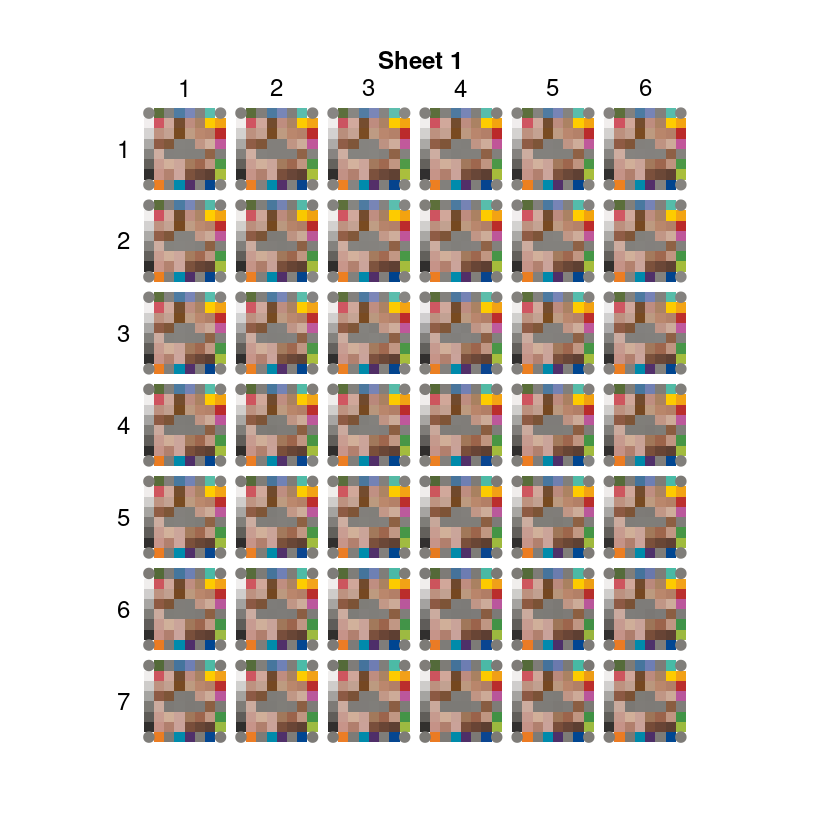

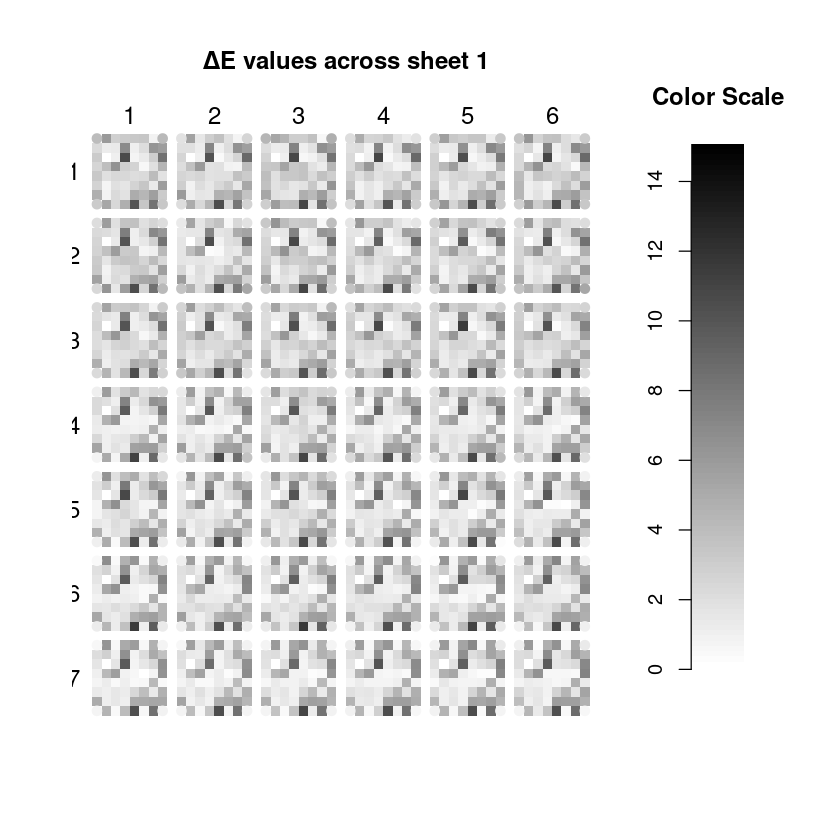

In [101]:
#displaying whole sheets
print_color_cards_grid(sheet_1, card_title = "Sheet 1")

print_color_cards_values_grid(sheet_1, mode = "Delta_E", card_title = "ΔE values across sheet 1")

Here are exemples of ΔE values across other sheets. Each exemple is slightly different, but the general tendency is an increase in ΔE values as we go down in the rows. Maybe it has to do with how the printer works.

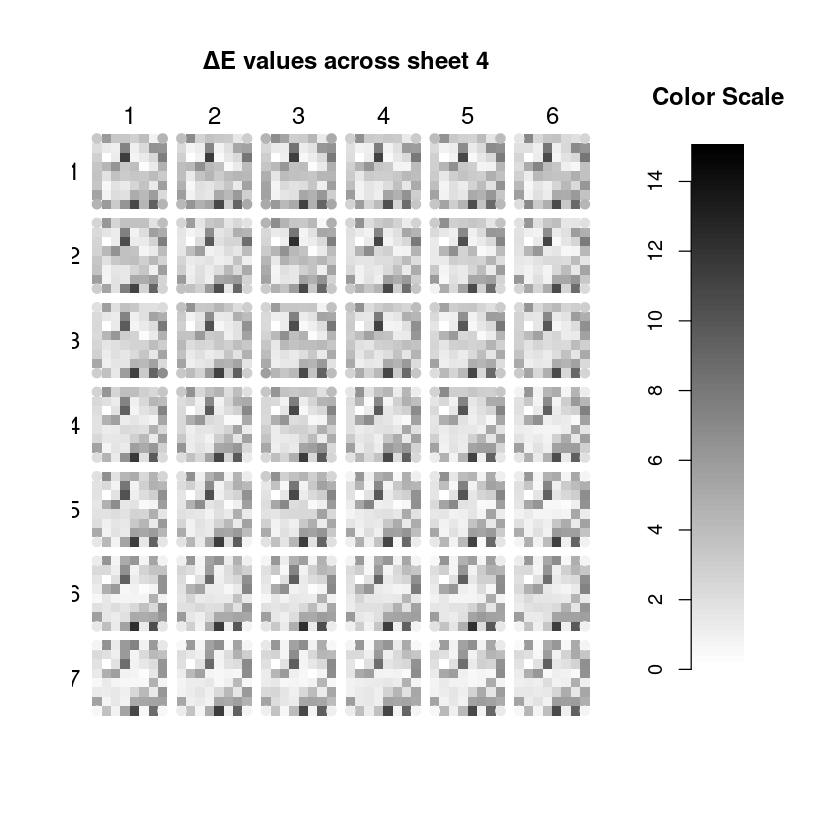

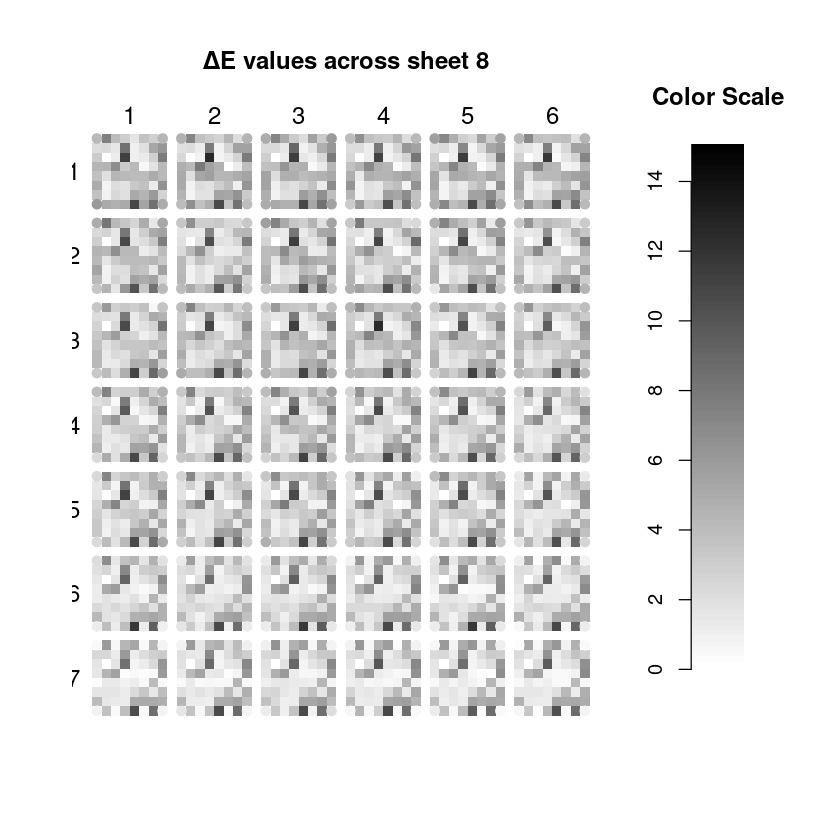

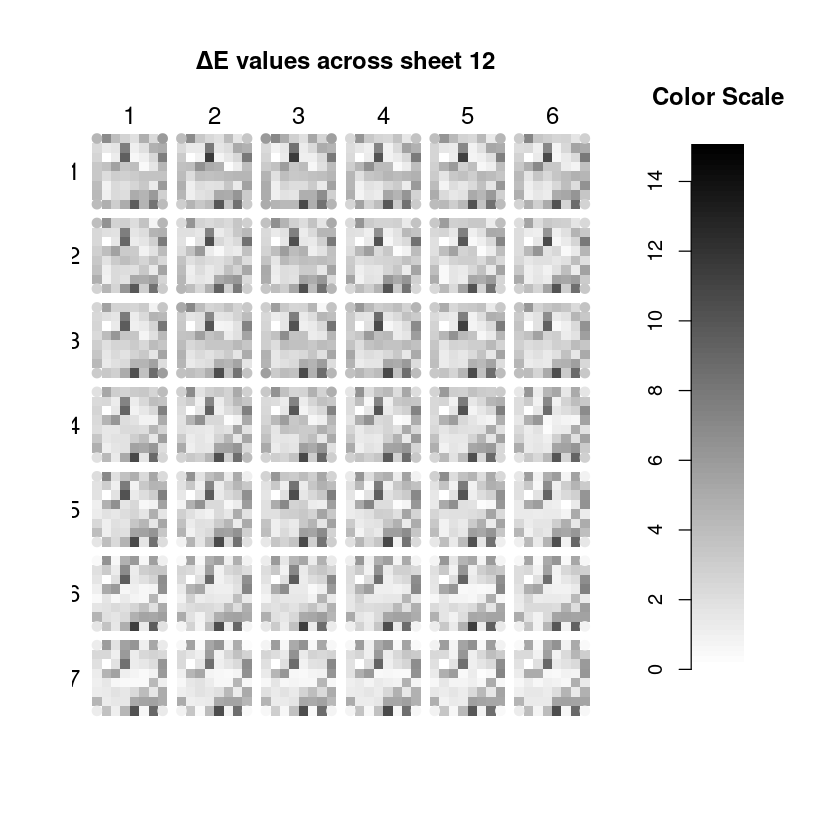

In [102]:
print_color_cards_values_grid(sheet_4, mode = "Delta_E", card_title = "ΔE values across sheet 4")

print_color_cards_values_grid(sheet_8, mode = "Delta_E", card_title = "ΔE values across sheet 8")

print_color_cards_values_grid(sheet_12, mode = "Delta_E", card_title = "ΔE values across sheet 12")

### 3. Methods

First, dplyr and tidyr packages were used to manipulate the original dataset in order to create a new one that is easier to use. Each row contains information about a specific color spot in the whole dataset of Lab measuredd values.
Sheet represents the sheet that the target is in.
Row and column represent the row and column of the target inside the sheet.
Position represents the number of a specific spot inside a target (there are 64 spots per target).

In [103]:
head(lab_measurements_wide)

Sheet Row Column position a        b        L       Delta_E 
1 1     1   1      1          0.1352   2.1851 55.5869 4.040576
2 1     1   1      2        -16.5998  26.5217 44.6537 5.998583
3 1     1   1      3          0.1276   2.2192 54.3402 2.825648
4 1     1   1      4         -4.2505 -25.3100 50.4460 3.030096
5 1     1   1      5          7.4995 -27.4593 56.9656 3.206832
6 1     1   1      6          0.0856   2.2408 54.9503 3.408770

Then, ΔE values where calculated between each single spot in the dataset and its corresponding spot in the reference card.

Using this modified version of the dataset, we first explored the data using boxplots and histograms.
While the Lab values are hard to interpret with these visualization tools, we can already get interesting informations regarding ΔE values. In fact, most of them are close to 0, and the further we go from 0, the less ΔE values there are. Most of the values seem to range from 0 to 12, but some of them are greater than 30. If we look at the ΔE values by position graph, we can see that all of these values lay at the 18th position in the color cards (row 3, column 2).

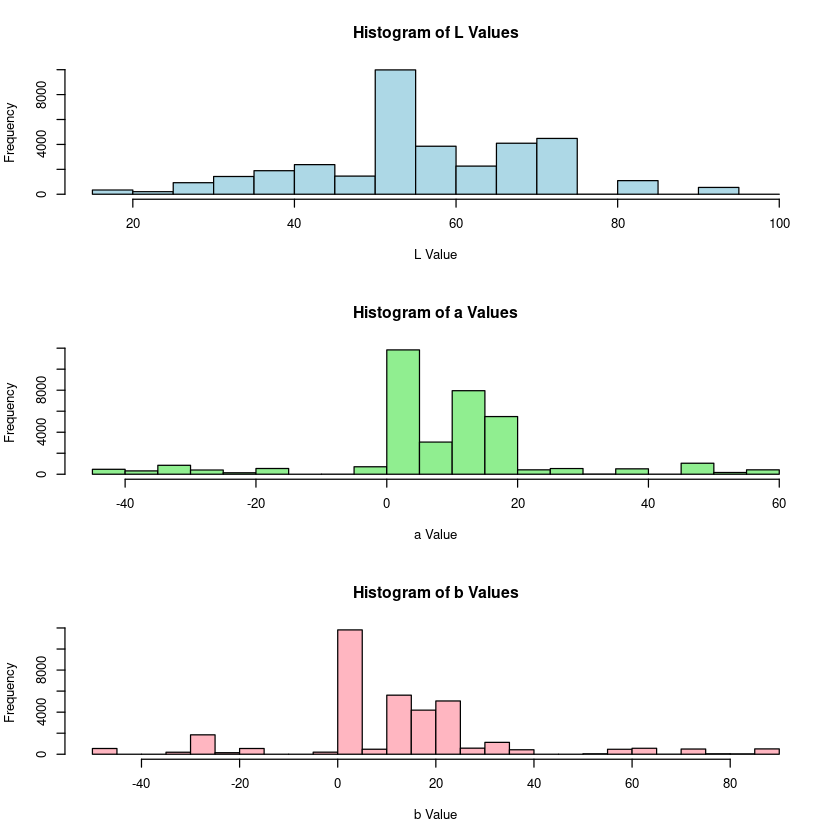

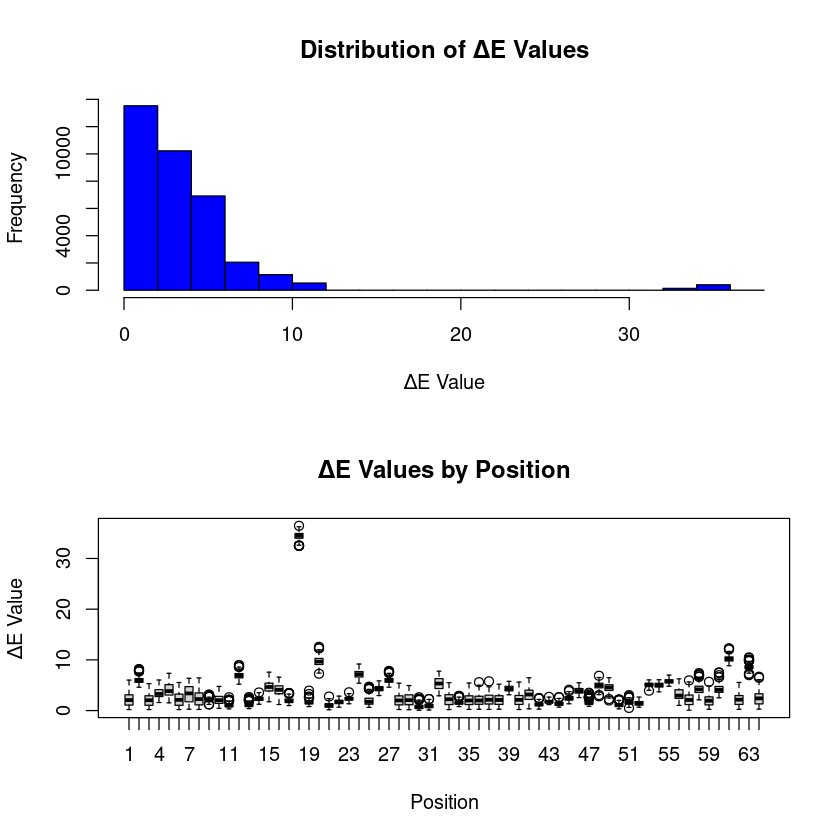

In [104]:
#different attempts to visualize color
par(mfrow = c(3, 1))
hist(lab_measurements_wide$L, breaks = 20, col = "lightblue", main = "Histogram of L Values", xlab = "L Value")
hist(lab_measurements_wide$a, breaks = 20, col = "lightgreen", main = "Histogram of a Values", xlab = "a Value")
hist(lab_measurements_wide$b, breaks = 20, col = "lightpink", main = "Histogram of b Values", xlab = "b Value")

#graphs on deltaE values
par(mfrow = c(2, 1))
hist(lab_measurements_wide$Delta_E, breaks = 20, col = "blue", border = "black",
      main = "Distribution of ΔE Values", xlab = "ΔE Value", ylab = "Frequency")
  
boxplot(Delta_E ~ position, data = lab_measurements_wide, main = "ΔE Values by Position",
        xlab = "Position", ylab = "ΔE Value", col = "lightgray")


In order to visualize these data more clearly, we created functions to display color cards on the screen. We can then use these functions to display representations of the color cards themselves by converting the Lab values to RGB values. We can also display L, a, b or ΔE values for each color spot using a color scale.

On the mean ΔE color card, we can indeed see that the spot at the 18th position has a higher ΔE value than every other spot. And if we look at this specific spot (number 18, row 3, column 2) on the reference color card, we can see that it is completely white.

This might either be an error in the original dataset, or abnormal values. Because of this, it was decided to ignore all the values in this specific spot, and to change the scale maximum from 40 to 15 (referring to the distribution of ΔE values).

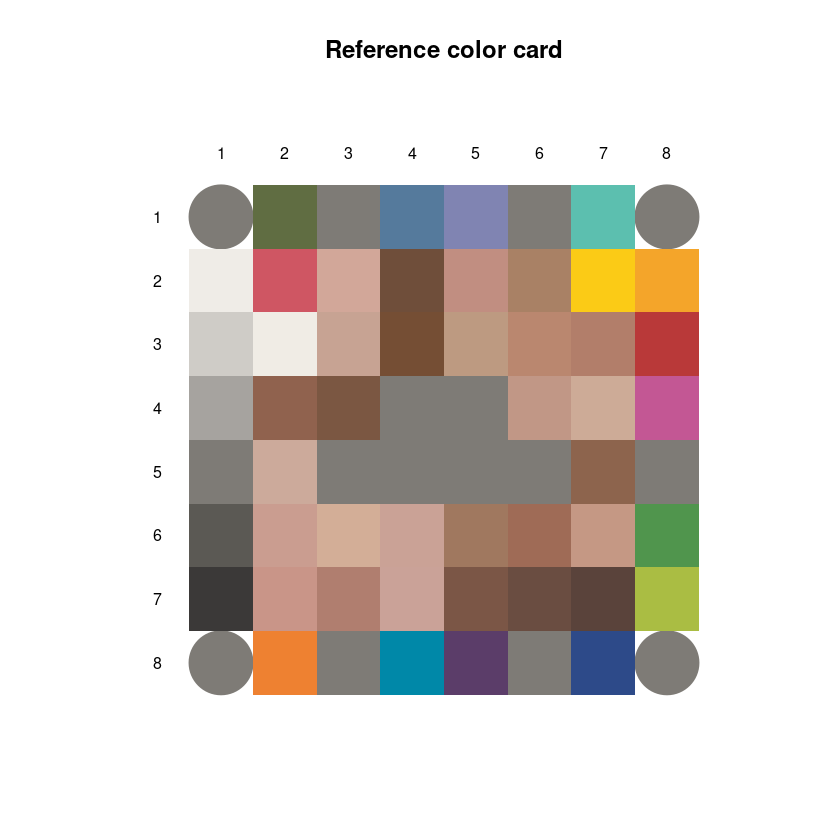

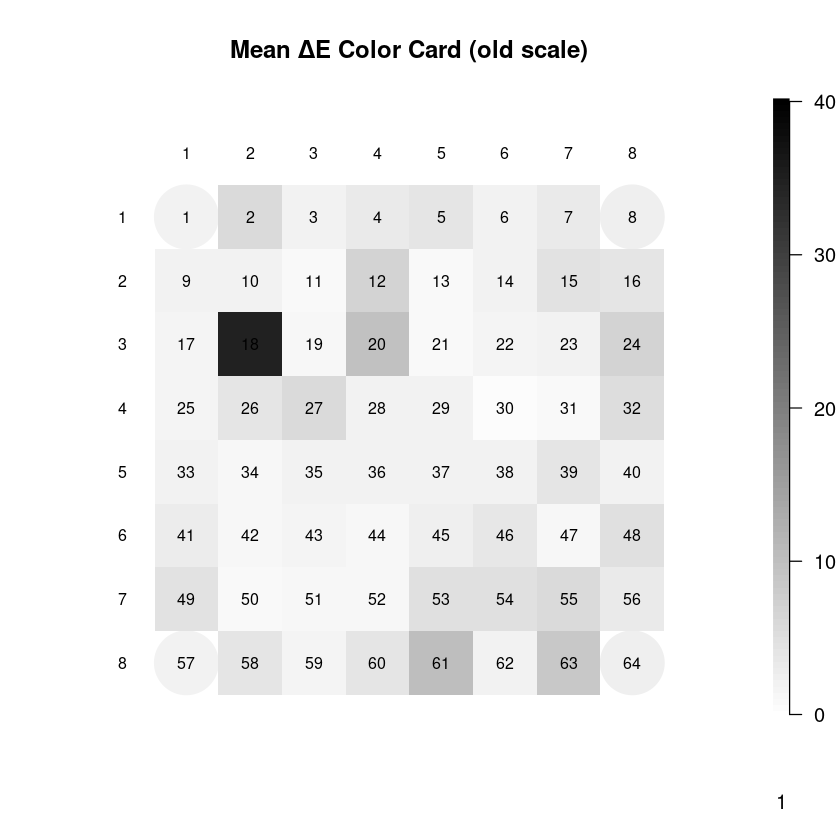

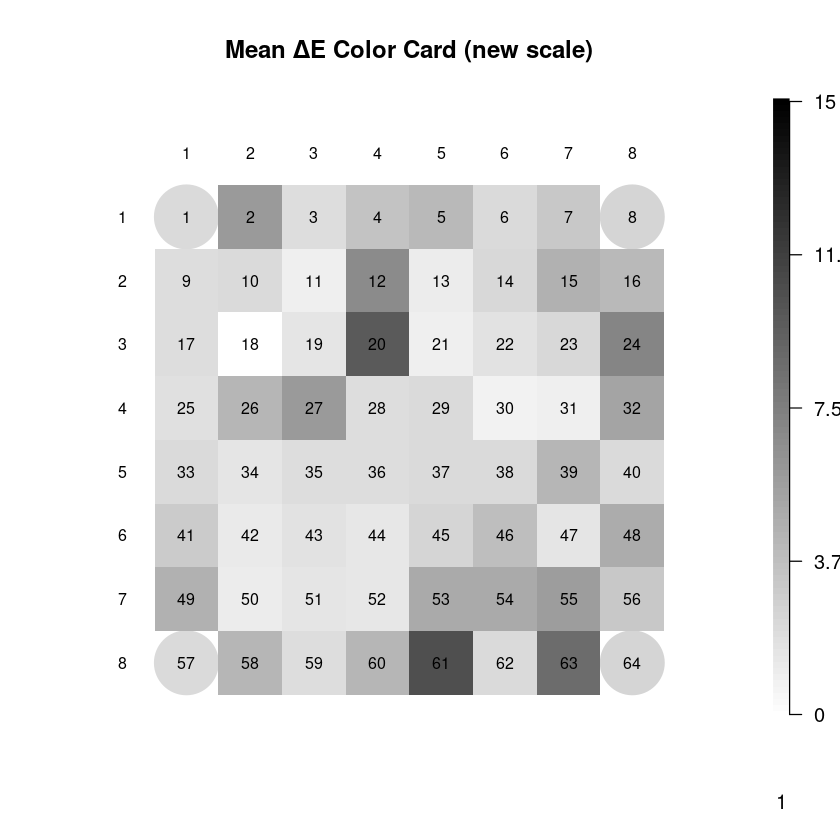

In [105]:
#displaying the colorcards
print_color_card_rgb(master_color_card$L, master_color_card$a, master_color_card$b, 
                     card_title = "Reference color card")

print_color_card_values(deltaE_stats$mean_deltaE, mode = "deltaE", card_title = "Mean ΔE Color Card (old scale)",
                    deltaE_max = 40, show_numbers = TRUE)

print_color_card_values(deltaE_stats$mean_deltaE, mode = "deltaE", card_title = "Mean ΔE Color Card (new scale)",
                    deltaE_max = 15, show_numbers = TRUE)

To visualize the dispersion of ΔE values across the sheets, functions to display all of the color cards of a single sheet next to each other on a grid. Using the same logic as the previous functions that print individual cards. Thus we can print either the actual sheets themselves by converting the Lab values to RGB values, or we can also display ΔE, L, a or b values using the same scale as before.

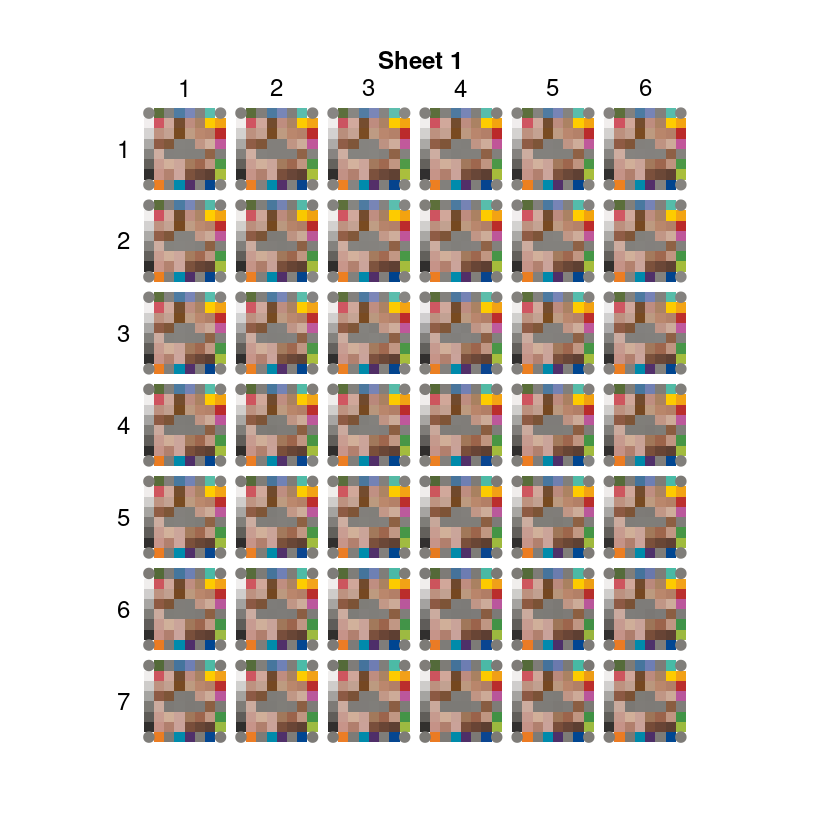

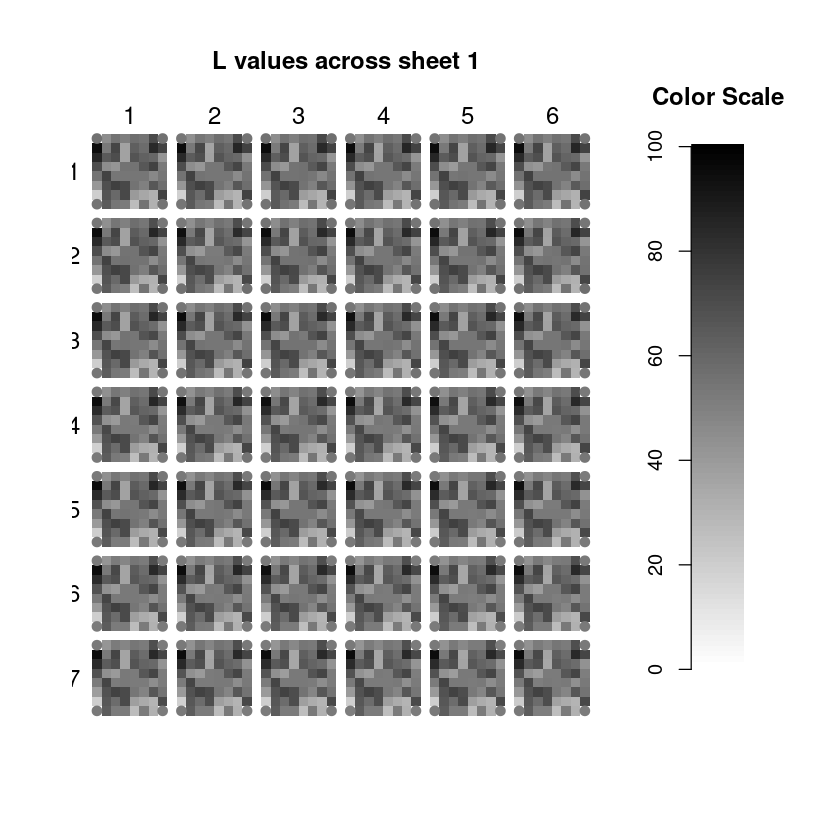

In [106]:
#displaying whole sheets
print_color_cards_grid(sheet_1, card_title = "Sheet 1")
print_color_cards_values_grid(sheet_1, mode = "L", card_title = "L values across sheet 1")


Finally, 3 dimensional scatter plots using threejs were used to visualize color values of the dataset in the Lab space.

In [107]:
#3D scatter plots
rgb_hex_values <- apply(lab_measurements_wide, 1, function(row) lab_to_rgb(row["L"], row["a"], row["b"])) #creating the colors vector

scatterplot3js(
  x = lab_measurements_wide$a,
  y = lab_measurements_wide$b,
  z = lab_measurements_wide$L,
  zlim = c(0, 100),
  xlim = c(-127, 128),
  ylim = c(128, -127),
  color = rgb_hex_values,
  size = 0.1,
  axisLabels = c("a", "L", "b"),
  main = "3D Scatter Plot of Lab Measurements (full scale)"
)

scatterplot3js(
  x = lab_measurements_wide$a,
  y = lab_measurements_wide$b,
  z = lab_measurements_wide$L,
  color = rgb_hex_values,
  flip.y = FALSE,
  size = 0.1,
  axisLabels = c("a", "L", "b"),
  main = "3D Scatter Plot of Lab Measurements (limited scale)"
)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

### 4. Background
These values come from Lab measurements of printouts of color cards. (fig picture of a color card).
These color cards are used by an app (douglas color expert) in order to determine the skin color of the user.
The motivation for this project resides in the fact that the colors that are actually printed can differ from the intented colors (on the reference card = master card). This could affect negatively the operation of the app. A low dispersion of values for each target (position on large sheet) can be low, because target-specific offsets can be taken care of in the app, but the difference in the values themselves should not be too large. 

The Lab color system is a color space defined by the International Commission on Illumination (CIE). It describes colors using three coordinates: L* (lightness), a* (green-red axis), and b* (blue-yellow axis). The L* value ranges from 0 (black) to 100 (white), indicating the lightness of the color. The a* and b* values are chromaticity coordinates, where positive a* values indicate red and negative values indicate green, while positive b* values indicate yellow and negative values indicate blue. a and b values both range from -127 to 128. This system is designed to be perceptually uniform, meaning that the same amount of numerical change corresponds to about the same amount of visually perceived change, making it particularly useful for color comparison and accurate color representation in various applications.
Because of this, we decided to only work with Lab values, despite having access to CYMKS values for the master card.

To measure the difference between the master card and the printed cards are calculated using ΔE (Delta E).
ΔE values are a quantitative measure of the difference between two colors in the Lab color space, calculated using the formula   $ \Delta E = \sqrt{(L_2 - L_1)^2 + (a_2 - a_1)^2 + (b_2 - b_1)^2} $. This formula involves the differences in the L*, a*, and b* values of the two colors, resulting in a single value that represents the overall color difference. A ΔE value of 0 indicates no difference, while higher values indicate greater differences. Generally, a ΔE value less than 1 is considered imperceptible to the human eye, values between 1 and 2 are perceptible through close observation, and values above 2 indicate noticeable differences.

### 5. Evaluative discussion

There are multiple problems with this work. First, the values on position 18 (row 3, column 2) that seem to be abnormal, so we decided to ignore them. 
Then the interpretation of ΔE values are limited. A more thourough approach could not be achieved due to the lack of time. But calculating the sum of all the ΔE values across a whole color card could have been a more precise way to measure the increase of ΔE values across sheets. As well as the numerical values themselves. Maube a threshold of bad ΔE values could be defined.
Also CYMKS values were completely ignored.
Nevertheless we still managed to show some dispersion across specific spots and across whole sheets.

### 6. References

wikipedia page on Lab color space: https://fr.wikipedia.org/wiki/L*a*b*_CIE_1976

### 7. Complete code

Run this before all of the previous cells for them to work properly.

In [108]:
#importing libraries and manipulating the data
library(dplyr) #data manipulation
library(tidyr) #data manipulation
library(scatterplot3d) #3d static plots
library(threejs) #3d interactive plots

#importing the data
setwd("~/work/BHT/data_visu/Project1")
lab_measurements = read.csv("LabMeasurements-Color-Card.csv", sep = ";", dec = ",")
master_color_card = read.csv("MasterColorCard.csv", sep = ";", dec = ",")

#setting a sheet column
lab_measurements$Sheet = rep(1:13, length.out = nrow(lab_measurements))
lab_measurements = lab_measurements[, c("Sheet", setdiff(names(lab_measurements), "Sheet"))]

#manipulating the data to make it easier to work with
lab_measurements_long = lab_measurements %>%
  gather(key = "measurement", value = "value", -Row, -Column, -Sheet) %>%
  separate(measurement, into = c("component", "position"), sep = 1)
positions = c(paste0(rep(1:8, each=8), 1:8))
position_mapping = setNames(1:64, positions)
lab_measurements_long$position = as.character(lab_measurements_long$position)
lab_measurements_long$position = as.numeric(position_mapping[lab_measurements_long$position])
lab_measurements_wide = lab_measurements_long %>%
  spread(key = component, value = value)

#deltaE calculations
lab_measurements_wide$Delta_E = NA

delta_e = function(L1, a1, b1, L2, a2, b2)
{
  sqrt((L2 - L1)^2 + (a2 - a1)^2 + (b2 - b1)^2)
}

for (i in 1:nrow(lab_measurements_wide))
{
  position = lab_measurements_wide$position[i]
  if (position >= 1 && position <= 64) {
    L1 = lab_measurements_wide$L[i]
    a1 = lab_measurements_wide$a[i]
    b1 = lab_measurements_wide$b[i]
    L2 = master_color_card$L[position]
    a2 = master_color_card$a[position]
    b2 = master_color_card$b[position]
    lab_measurements_wide$Delta_E[i] = delta_e(L1, a1, b1, L2, a2, b2)
  }
}

#stats on Lab values
lab_measurements_stats = lab_measurements_wide %>%
  group_by(position) %>%
  summarize(
    mean_L = mean(L, na.rm = TRUE),
    sd_L = sd(L, na.rm = TRUE),
    mean_a = mean(a, na.rm = TRUE),
    sd_a = sd(a, na.rm = TRUE),
    mean_b = mean(b, na.rm = TRUE),
    sd_b = sd(b, na.rm = TRUE)
  ) %>%
  filter(position %in% c(1:64)) %>%
  arrange(as.numeric(position))

deltaE_stats = lab_measurements_wide %>%
  group_by(position) %>%
  summarize(
    mean_deltaE = mean(Delta_E, na.rm = TRUE),
    sd_deltaE = sd(Delta_E, na.rm = TRUE),
  ) %>%
  filter(position %in% c(1:64)) %>%
  arrange(as.numeric(position))

L_stats = lab_measurements_wide %>%
  group_by(position) %>%
  summarize(
    mean_L = mean(L, na.rm = TRUE),
    sd_L = sd(L, na.rm = TRUE),
  ) %>%
  filter(position %in% c(1:64)) %>%
  arrange(as.numeric(position))

a_stats = lab_measurements_wide %>%
  group_by(position) %>%
  summarize(
    mean_a = mean(a, na.rm = TRUE),
    sd_a = sd(a, na.rm = TRUE),
  ) %>%
  filter(position %in% c(1:64)) %>%
  arrange(as.numeric(position))

b_stats = lab_measurements_wide %>%
  group_by(position) %>%
  summarize(
    mean_b = mean(b, na.rm = TRUE),
    sd_b = sd(b, na.rm = TRUE),
  ) %>%
  filter(position %in% c(1:64)) %>%
  arrange(as.numeric(position))

get_target = function(dataset, sheet = 0, row = 0, column = 0)
{
  if (row == 0 & column == 0)
    return(dataset[dataset$Sheet == sheet, ])
  else if (sheet == 0)
    return(dataset[dataset$Row == row & dataset$Column == column, ])
  else 
    return(dataset[dataset$Sheet == sheet & dataset$Row == row & dataset$Column == column, ])
}

sheet_1 = get_target(lab_measurements_wide, sheet = 1)
sheet_2 = get_target(lab_measurements_wide, sheet = 2)
sheet_3 = get_target(lab_measurements_wide, sheet = 3)
sheet_4 = get_target(lab_measurements_wide, sheet = 4)
sheet_5 = get_target(lab_measurements_wide, sheet = 5)
sheet_6 = get_target(lab_measurements_wide, sheet = 6)
sheet_7 = get_target(lab_measurements_wide, sheet = 7)
sheet_8 = get_target(lab_measurements_wide, sheet = 8)
sheet_9 = get_target(lab_measurements_wide, sheet = 9)
sheet_10 = get_target(lab_measurements_wide, sheet = 10)
sheet_11 = get_target(lab_measurements_wide, sheet = 11)
sheet_12 = get_target(lab_measurements_wide, sheet = 12)
sheet_13 = get_target(lab_measurements_wide, sheet = 13)

In [109]:
#color functions and color cards visualization

lab_to_rgb = function(L, a, b)
{
  lab_to_xyz = function(L, a, b)
  {
    y = (L + 16) / 116
    x = a / 500 + y
    z = y - b / 200
    
    x = ifelse(x^3 > 0.008856, x^3, (x - 16 / 116) / 7.787)
    y = ifelse(y^3 > 0.008856, y^3, (y - 16 / 116) / 7.787)
    z = ifelse(z^3 > 0.008856, z^3, (z - 16 / 116) / 7.787)
    
    x = x * 95.047
    y = y * 100.000
    z = z * 108.883
    
    return(c(x, y, z))
  }
  
  xyz_to_rgb = function(x, y, z)
  {
    x = x / 100
    y = y / 100
    z = z / 100
    
    r = x * 3.2406 + y * -1.5372 + z * -0.4986
    g = x * -0.9689 + y * 1.8758 + z * 0.0415
    b = x * 0.0557 + y * -0.2040 + z * 1.0570
    
    r = ifelse(r > 0.0031308, 1.055 * (r^(1 / 2.4)) - 0.055, 12.92 * r)
    g = ifelse(g > 0.0031308, 1.055 * (g^(1 / 2.4)) - 0.055, 12.92 * g)
    b = ifelse(b > 0.0031308, 1.055 * (b^(1 / 2.4)) - 0.055, 12.92 * b)
    
    rgb = c(r, g, b)
    rgb = pmax(pmin(rgb, 1), 0)
    
    return(rgb)
  }
  xyz = lab_to_xyz(L, a, b)
  rgb = xyz_to_rgb(xyz[1], xyz[2], xyz[3])
  rgb_hex = grDevices::rgb(rgb[1], rgb[2], rgb[3])
  
  return(rgb_hex)
}

print_color_card_rgb <- function(L_values, a_values, b_values, card_title = "Color Card") {
  ncol = 8
  nrow = 8
  
  colors = mapply(lab_to_rgb, L_values, a_values, b_values)
  color_matrix = matrix(colors, nrow = nrow, ncol = ncol, byrow = TRUE)
  
  #setting up the graph
  par(mar = c(5, 4, 4, 2) + 0.1)  
  plot(1, type = "n", xlab = "", ylab = "", xlim = c(0, ncol), ylim = c(0, nrow + 1), asp = 1, axes = FALSE, main = card_title)
  
  #adding the indices
  for (i in 1:nrow)
    text(-0.5, nrow - i + 0.5, labels = as.character(i), cex = 0.8)
  for (j in 1:ncol)
    text(j - 0.5, nrow + 0.5, labels = as.character(j), cex = 0.8)
  
  # Corner circles
  radius = 0.5
  circle_positions = data.frame(
    x = c(0.5, ncol - 0.5, 0.5, ncol - 0.5),
    y = c(nrow - 0.5, nrow - 0.5, 0.5, 0.5)
  )
  circle_colors = c(color_matrix[1, 1], color_matrix[1, ncol], color_matrix[nrow, 1], color_matrix[nrow, ncol])
  symbols(circle_positions$x, circle_positions$y, circles = rep(radius, 4), add = TRUE, inches = FALSE, bg = circle_colors, fg = circle_colors)
  
  #filling the card
  for (i in 1:nrow)
  {
    for (j in 1:ncol)
    {
      if (!((i == 1 && j == 1) || (i == 1 && j == ncol) || (i == nrow && j == 1) || (i == nrow && j == ncol)))
        rect(j - 1, nrow - i, j, nrow - i + 1, col = color_matrix[i, j], border = NA)
    }
  }
}

#attempting to visualize deltaE on colorcards
print_color_card_values = function(values, mode = "deltaE", card_title = "ΔE Color Card",
                                    show_numbers = FALSE, palette = "grey_scale",
                                    deltaE_max = 15)
{
  ncol = 8
  nrow = 8
  if (palette == "grey_scale")
    color_palette = colorRampPalette(c("white", "black"))(100)
  else if (palette == "orange_scale")
    color_palette = colorRampPalette(c("red", "orange", "yellow", "lightyellow"))(100)
  else if (palette == "rainbow_scale")
    color_palette = colorRampPalette(c("blue", "green", "yellow", "red"))(100)

  if (mode == "deltaE")
    color_bins <- cut(values, breaks = seq(0, deltaE_max, length.out = 101), labels = FALSE)
  #setback to 0,40 one time to show problem in dataset
  if (mode == "L")
    color_bins <- cut(values, breaks = seq(0, 100, length.out = 101), labels = FALSE)
  if (mode == "ab")
    color_bins <- cut(values, breaks = seq(-127, 128, length.out = 101), labels = FALSE)
  colors = color_palette[color_bins]
  color_matrix = matrix(colors, nrow = nrow, ncol = ncol, byrow = TRUE)
  
  #margins for title and 
  layout(matrix(c(1, 2), ncol = 2), widths = c(4, 0.5))
  par(mar = c(5, 4, 4, 1) + 0.1)
  
  #setting up the graph and the scale
  plot(1, type = "n", xlab = "", ylab = "", xlim = c(0, ncol), ylim = c(0, nrow + 1), asp = 1, axes = FALSE, main = card_title)  

  #adding indices
  for (i in 1:nrow)
    text(-0.5, nrow - i + 0.5, labels = as.character(i), cex = 0.8)
  for (j in 1:ncol)
    text(j - 0.5, nrow + 0.5, labels = as.character(j), cex = 0.8)

  #corner circles
  radius = 0.5
  circle_positions = data.frame(
    x = c(0.5, ncol - 0.5, 0.5, ncol - 0.5),
    y = c(nrow - 0.5, nrow - 0.5, 0.5, 0.5)
  )
  circle_colors = c(color_matrix[1, 1], color_matrix[1, ncol], color_matrix[nrow, 1], color_matrix[nrow, ncol])
  symbols(circle_positions$x, circle_positions$y, circles = rep(radius, 4), add = TRUE, inches = FALSE, bg = circle_colors, fg = circle_colors)
  
  #filling the card
  for(i in 1:nrow) {
    for(j in 1:ncol) {
      if(!((i == 1 && j == 1) || (i == 1 && j == ncol) || (i == nrow && j == 1) || (i == nrow && j == ncol)))
        rect(j-1, nrow-i, j, nrow-i+1, col = color_matrix[i, j], border = NA)
    }
  }
  
  if (show_numbers == TRUE)
  {
    spot_number <- 1
    for(i in 1:nrow) {
      for(j in 1:ncol) {
          text(j-0.5, nrow-i+0.5, labels = spot_number, cex = 0.8, col = "black")
          spot_number <- spot_number + 1
        }
      }
  }
  #showing the color scale
  par(mar = c(5, 1, 4, 2) + 0.1)
  image(1, seq(0, 1, length.out = 100), t(matrix(1:100, ncol = 1)), col = color_palette, axes = FALSE)
  if (mode == "L")
  {
    axis(4, at = seq(0, 1, length.out = 5), labels = seq(0, 100, length.out = 5), las = 1)
    mtext("L scale", side = 4, line = 2)
  }
  else if (mode == "ab")
  {
    axis(4, at = seq(0, 1, length.out = 5), labels = seq(-127, 128, length.out = 5), las = 1)
    mtext("ab scale", side = 4, line = 2)
  }
  else
  {
    axis(4, at = seq(0, 1, length.out = 5), labels = seq(0, deltaE_max, length.out = 5), las = 1)
    mtext("scale", side = 4, line = 2)
  }
  par(mfrow = c(1, 1))
  layout(1)
}


In [110]:
#grid visualization

print_color_cards_grid <- function(dataset, card_title = "Color Cards")
{
  ncol = 8
  nrow = 8
  spacing = 1
  
  total_cards = nrow(dataset) / (ncol * nrow)
  
  grid_rows = 7
  grid_cols = 6
  
  par(mar = c(1, 1, 1, 1), oma = c(2, 2, 2, 2))
  plot(1, type = "n", xlab = "", ylab = "", xlim = c(0, grid_cols * (ncol + spacing)),
  ylim = c(0, grid_rows * (nrow + spacing)), asp = 1, axes = FALSE, main = card_title)
  
  #adding grid indices
  for (i in 1:grid_rows)
    text(-2, (grid_rows - i) * (nrow + spacing) + nrow / 2, labels = as.character(i), cex = 1.2)
  for (j in 1:grid_cols)
    text((j - 1) * (ncol + spacing) + ncol / 2, grid_rows * (nrow + spacing) + 1, labels = as.character(j), cex = 1.2)
  
  #main loop
  for(card in 1:total_cards) {
    start_idx = (card - 1) * (ncol * nrow) + 1
    end_idx = card * (ncol * nrow)
    
    #color conversion
    card_data = dataset[start_idx:end_idx, ]
    L_values = card_data$L
    a_values = card_data$a
    b_values = card_data$b
    colors = mapply(lab_to_rgb, L_values, a_values, b_values)
    color_matrix = matrix(colors, nrow = nrow, ncol = ncol, byrow = TRUE)
    
    #calculating the position of the current card
    row_idx = (card - 1) %/% grid_cols
    col_idx = (card - 1) %% grid_cols
    
    x_offset = col_idx * (ncol + spacing)
    y_offset = (grid_rows - 1 - row_idx) * (nrow + spacing)
    
    #drawing the current card
    for(i in 1:nrow) {
      for(j in 1:ncol) {
        x_left = j - 1 + x_offset
        x_right = j + x_offset
        y_bottom = y_offset + (nrow - i)
        y_top = y_offset + (nrow - i + 1)
        if(!((i == 1 && j == 1) || (i == 1 && j == ncol) || (i == nrow && j == 1) || (i == nrow && j == ncol))) {
          rect(x_left, y_bottom, x_right, y_top, col = color_matrix[i, j], border = NA)
        }
      }
    }
    
    #drawing the circles for the current card
    radius = 0.5
    circle_positions = data.frame(
      x = c(0.5, ncol - 0.5, 0.5, ncol - 0.5) + x_offset,
      y = c(nrow - 0.5, nrow - 0.5, 0.5, 0.5) + y_offset
    )
    circle_colors = c(color_matrix[1, 1], color_matrix[1, ncol], color_matrix[nrow, 1], color_matrix[nrow, ncol])
    symbols(circle_positions$x, circle_positions$y, circles = rep(radius, 4), add = TRUE, inches = FALSE, bg = circle_colors, fg = circle_colors)
  }
}

print_color_cards_values_grid <- function(dataset, mode = "Delta_E", log_scale = FALSE,
                                          show_numbers = FALSE, color_palette = "grey_scale",
                                          deltaE_max = 15, card_title = "Color Cards")
{
  ncol = 8
  nrow = 8
  spacing = 1
  
  total_cards = nrow(dataset) / (ncol * nrow)
  grid_rows = 7
  grid_cols = 6
  
  #setting up the plot
  layout(matrix(c(1, 2), nrow = 1), widths = c(4, 1))
  par(mar = c(1, 1, 1, 1), oma = c(2, 2, 2, 2))
  plot(1, type = "n", xlab = "", ylab = "", xlim = c(0, grid_cols * (ncol + spacing)),
       ylim = c(0, grid_rows * (nrow + spacing)), asp = 1, axes = FALSE, main = card_title)
  
  #adding grid indices
  for (i in 1:grid_rows)
    text(-2, (grid_rows - i) * (nrow + spacing) + nrow / 2, labels = as.character(i), cex = 1.2)
  for (j in 1:grid_cols)
    text((j - 1) * (ncol + spacing) + ncol / 2, grid_rows * (nrow + spacing) + 1, labels = as.character(j), cex = 1.2)
  
  #define the color palette
  if (color_palette == "grey_scale")
    color_palette = colorRampPalette(c("white", "black"))(100)
  else if (color_palette == "orange_scale")
    color_palette = colorRampPalette(c("red", "orange", "yellow", "lightyellow"))(100)
  else if (color_palette == "rainbow_scale")
    color_palette = colorRampPalette(c("blue", "green", "yellow", "red"))(100)
  
  values = as.numeric(dataset[[mode]])
  
  if (mode == "Delta_E")
    color_bins <- cut(values, breaks = seq(0, deltaE_max, length.out = 101), labels = FALSE)
  else if (mode == "L")
    color_bins <- cut(values, breaks = seq(0, 100, length.out = 101), labels = FALSE)
  else if (mode == "a" || mode == "b")
    color_bins <- cut(values, breaks = seq(-127, 128, length.out = 101), labels = FALSE)
  
  dataset$color <- color_palette[color_bins]
  
  #main loop
  for(card in 1:total_cards) {
    start_idx = (card - 1) * (ncol * nrow) + 1
    end_idx = card * (ncol * nrow)
    
    card_data = dataset[start_idx:end_idx, ]
    colors = card_data$color
    color_matrix = matrix(colors, nrow = nrow, ncol = ncol, byrow = TRUE)
    
    row_idx = (card - 1) %/% grid_cols
    col_idx = (card - 1) %% grid_cols
    x_offset = col_idx * (ncol + spacing)
    y_offset = (grid_rows - 1 - row_idx) * (nrow + spacing)
    
    #drawing the current color card
    for(i in 1:nrow)
    {
      for(j in 1:ncol)
      {
        x_left = j - 1 + x_offset
        x_right = j + x_offset
        y_bottom = y_offset + (nrow - i)
        y_top = y_offset + (nrow - i + 1)
        if(!((i == 1 && j == 1) || (i == 1 && j == ncol) || (i == nrow && j == 1) || (i == nrow && j == ncol)))
          rect(x_left, y_bottom, x_right, y_top, col = color_matrix[i, j], border = NA)
      }
    }
    
    #drawing the current color card circles
    radius = 0.5
    circle_positions = data.frame(
      x = c(0.5, ncol - 0.5, 0.5, ncol - 0.5) + x_offset,
      y = c(nrow - 0.5, nrow - 0.5, 0.5, 0.5) + y_offset
    )
    circle_colors = c(color_matrix[1, 1], color_matrix[1, ncol], color_matrix[nrow, 1], color_matrix[nrow, ncol])
    symbols(circle_positions$x, circle_positions$y, circles = rep(radius, 4), add = TRUE, inches = FALSE, bg = circle_colors, fg = circle_colors)
  }
  
  #displaying the color scale
  par(mar = c(5, 2, 4, 2))
  if (mode == "Delta_E")
    image(1, seq(0, deltaE_max, length.out = 101), t(matrix(seq(0, deltaE_max, length.out = 101), ncol = 1)),
        col = color_palette, axes = FALSE, xlab = "", ylab = "", main = "Color Scale")
  else if (mode == "L")
    image(1, seq(0, 100, length.out = 101), t(matrix(seq(0, 100, length.out = 101), ncol = 1)),
        col = color_palette, axes = FALSE, xlab = "", ylab = "", main = "Color Scale")
  else if (mode == "a" || mode == "b")
    image(1, seq(-127, 128, length.out = 101), t(matrix(seq(-127, 128, length.out = 101), ncol = 1)),
        col = color_palette, axes = FALSE, xlab = "", ylab = "", main = "Color Scale")
  axis(2)
  
  par(mfrow = c(1, 1))
  layout(1)
}

